In [1]:
#Assumption of linear regression 
'''1. There should be linearrelation ship between input and output variables
   2. if relation is linear so this should be homoskedastic relation(means 
   datapoints are close each other) not heteroskeastic relation 
   (means datapoints are scatterd)
   3. There should be no multicolineraity (means not correlated with 2 input
     each other)
    4. Relation should be normal distributed curve means well shaped curve
    means mean=median=mode means no skewness '''

'1. There should be linearrelation ship between input and output variables\n   2. if relation is linear so this should be homoskedastic relation(means \n   datapoints are close each other) not heteroskeastic relation \n   (means datapoints are scatterd)\n   3. There should be no multicolineraity (means not correlated with 2 input\n     each other)\n    4. Relation should be normal distributed curve means well shaped curve\n    means mean=median=mode means no skewness '

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
#to load dataset
df=pd.read_csv("Advertising.csv")
#to show first 5 records
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True) #to delete permanently column 
#Unnamed: 0 from dataframe df
#to show first 5 records
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#to check null values 
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
#in ths dataset , we want to predict sales means this is contineous numeric value
#means solve by linear regression
#we have multiple input so we use multiple linear regression means many input
#and one output

In [8]:
#basic steps means visualise the scatterplot between input and output , to check
#relation between input and output

#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable

In [9]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

TV


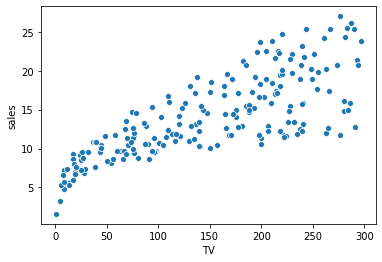

radio


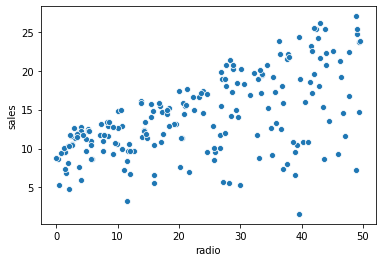

newspaper


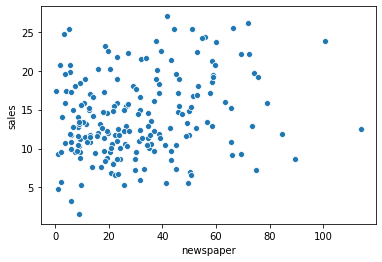

In [10]:
#we create a scatter plot
for col in X :
    print(col)
    sns.scatterplot(df[col],Y)   #scatterplot(X,Y)
    plt.show()

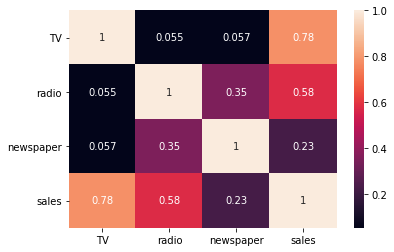

In [11]:
#check correlation value and visualize in heatmap()
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
#select input and output from dataset df
X=df.drop("sales",axis=1) #to copy all columns from df to X apart from sales
#here X input variable
Y=df["sales"] #output variable

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
df.shape

(200, 4)

In [15]:
##Divide the dataset into 70% and 30% for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [16]:
X_train.shape

(140, 3)

In [17]:
X_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [18]:
#we train the model with the help of multiple linear regression 
#equation of MLR :  Y_pred=m1*X1+m2*X2+m3*X3+b
#X1=TV X2=radio and X3=newspaper
#means Y_pred=m1*TV+m2*radio+m3*newspaper+b

#call class LinearRegression 
from sklearn.linear_model import LinearRegression

In [19]:
#Create object of LinearRegression class
lr=LinearRegression()

In [20]:
#train the model use fit() with 70% training data 
#fit() is a inbuilt method of LinearRegression class
lr.fit(X_train,Y_train) 

LinearRegression()

In [21]:
#to show the slope oe coefficient of all input features then use inbuilt
#method coef_
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [22]:
#to show intercept b use inbuilt method intercept_
lr.intercept_

2.9372157346906107

In [23]:
#we test the model then use inbuilt function predict() of LinearRegression class
#Y_pred=TV*m1+radio*m2+newspaper*m3+b
Y_pred=lr.predict(X_test)

In [24]:
#mean_squared_error find then call class inbuilt
from sklearn.metrics import mean_squared_error

#check mean_squared_error
mean_squared_error(Y_test,Y_pred)

1.9289249074665737

In [25]:
#evaluation of model , find the r2-score , call inbuilt class 
from sklearn.metrics import r2_score

r2_score(Y_test,Y_pred) #range of r2-score : 0 to 1
#r2_score>0.5 then good but best >.90 but we try >.95

0.9224605706201434

In [26]:
#score is best but try >.95

In [27]:
#Assumption check of linear regression in this model  :
#1. There should be no multicolinearity

#radio and newspaper both input are correlated each other so delete any 
#one input so how to decide whose input are deleted ,
#we check corelation between radio and o/p sales which is 0.57 
#and check corr between newspaper and o/p sales which is 0.23 
#means corr between radio and o/p sales > corr between newspaper and o/p sales 
#means select radio and delete newspaper

X=df[["TV","radio"]] #2D input features (input always 2 D)
Y=df["sales"] #output means target 
#means we solve 1 assumption of linear regression(remove multicolinearity )

In [28]:
##Divide the dataset into 70% and 30% for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [29]:
#Create object of LinearRegression class
lr=LinearRegression()

In [30]:
#train the model use fit() with 70% training data 
#fit() is a inbuilt method of LinearRegression class
lr.fit(X_train,Y_train) 

LinearRegression()

In [31]:
#to show the slope oe coefficient of all input features then use inbuilt
#method coef_
lr.coef_

array([0.04697554, 0.17765046])

In [32]:
#Test the model
Y_pred=lr.predict(X_test)

In [33]:
mean_squared_error(Y_test,Y_pred)

1.9147050289721803

In [34]:
r2_score(Y_test,Y_pred)

0.92303218502568

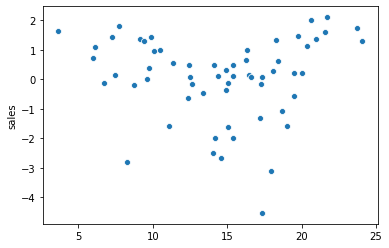

In [35]:
#very good score but more better

#Assumption check of linear regression in this model  :
#1.
#2. There should be linear relationship between input and output 

#here input : TV and radio  and output sales
#How to chekc relation relationship : with the help of sctterplot(X,Y)
#we have trick means hack , we find residual after than draw scatterplot 
#between residuals and Y_pred and check either linear relation or not
residuals=Y_test-Y_pred
sns.scatterplot(Y_pred,residuals)
plt.show()

In [36]:
#To see this scatterplot , we got curve not a no linear relation means no 
#linear relation between input(TV and radio) and output(sales) means 
#this assumption is fail


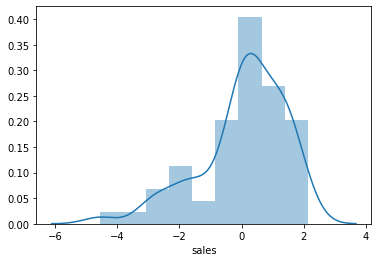

In [37]:
#assumption 4 . there should be normal distribution curve means well shaped
#curve means no skewness 
#we visualise frequency graph w.t.h of distplot
sns.distplot(residuals)
plt.show()

In [38]:
#see this graph , not got Normal distribution curve

In [39]:
#we work on remaining 3 assumption   of linear regression
#means increase the degree of X means use polynomial linear regression(PLR)


In [40]:
#We perform the Polynomials Regression  , call inbuilt class PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

In [41]:
#Create the object of PolynomialFeatures class and pass the degree of X(input
#features)
pf=PolynomialFeatures(2) #here 2 is a degree of X  means
#increase the degree of X
#Eq : ax^2+b^x+c=0  means Y=m1*X^2+m2*X+b

In [42]:
X=df[["TV","radio"]] #input feature , always input 2D
Y=df["sales"] #target means ouput

In [43]:
#equation :  X1=TV  and X2=radio
#equation m1X1^2+m2*X1^1 : TV   and m3X2^2+m4*X2^1 : radio
#Y_pred=m1X1^2+m2*X1^1+m3X2^2+m4*X2^1+b

X_poly=pf.fit_transform(X)
#fit_transform() inbuilt function of PolynomialFeatures

In [44]:
#Apply same steps means train_test_split() : 70% and 30%
#Divide the dataset into 70% and 30% for training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [45]:
#create the object of LinearRegression class
lr=LinearRegression()

In [46]:
#train the model with 70% data use fit() method
lr.fit(X_train,Y_train)

LinearRegression()

In [47]:
#Test the model use inbuilt method predict() of LinearRegression class
Y_pred=lr.predict(X_test)

In [48]:
mean_squared_error(Y_test,Y_pred)

0.17238345081008266

In [49]:
r2_score(Y_test,Y_pred)

0.9930704848288263

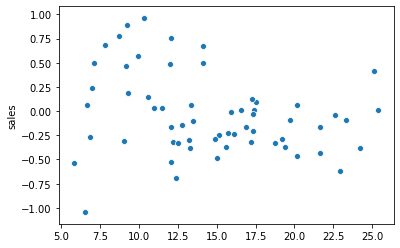

In [50]:
# excellent score 99%
#But check assumption of Linear regression : -

#2. There should be linear relationship between input and output 
#here input : TV and radio  and output sales
#How to check relation relationship : with the help of sctterplot(X,Y)
#we have trick means hack , we find residual after than draw scatterplot 
#between residuals and Y_pred and check either linear relation or not
residuals=Y_test-Y_pred
sns.scatterplot(Y_pred,residuals)
plt.show()

In [51]:
#fullfill first assumption means linear relationship between input and output 
#here -ve corelation 
#but here heteroskedastic  but should be homoskedastic 

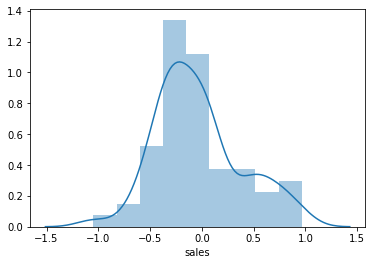

In [52]:
#check 4th assumption : there should be normal distributed curve 
#we visualise frequency graph w.t.h of distplot
sns.distplot(residuals)
plt.show()

In [ ]:
#assumption of Linear regression
#1. linear relationship
#2. homoskedastik . not heteroskedastioc
#3. Multicolinearity
#4. Normal distributed